# The workbook
creating a workbook because then you could see what steps that i took to make my conclusions

In [1]:
#installing required libraries 
%pip install pandas seaborn matplotlib numpy
#importing the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 61.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 85.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 75.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 85.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.0 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the data 
df = pd.read_csv("./medical_examination.csv")
#checking
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data cleaning

In [3]:
#Creating overweight column in the df variable based on BMI
df["overweight"]= (df['weight'] / ((df['height'] / 100) ** 2)) > 25
# Convert overweight boolean to 0 or 1
df['overweight'] = df['overweight'].astype(int)

Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [4]:
df["cholesterol"] = df["cholesterol"].apply(lambda x:0 if x ==1 else 1)
df["gluc"] = df["gluc"].apply(lambda x:0 if x==1 else 1)
#checking for the changes

print(df["cholesterol"].value_counts(),
df["gluc"].value_counts())

cholesterol
0    52385
1    17615
Name: count, dtype: int64 gluc
0    59479
1    10521
Name: count, dtype: int64


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

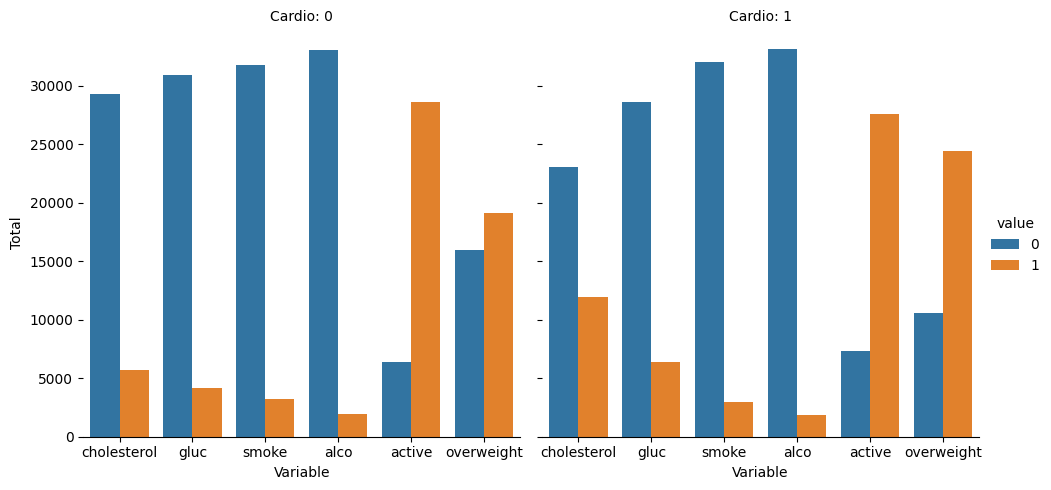

In [5]:
#converting to long format 
df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol","gluc","smoke","alco","active","overweight"]
)
def draw_cat_plot():
    catplot = sns.catplot(
        x='variable',
        hue='value',
        col='cardio',
        data=df_cat,
        kind='count',
        height=5,
        aspect=1
    )
    
    catplot.set_axis_labels('Variable', 'Total')
    catplot.set_titles('Cardio: {col_name}')
    catplot.despine(left=True)

    
    plt.show()
draw_cat_plot()

Clean the data. Filter out the following patient segments that represent incorrect data:/n
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [6]:
print(df.shape)
df=df[df["ap_lo"] <= df['ap_hi']]
#ensuring that the changes are made
print(df.shape)
#filtering hight data 
height_25= df['height'].quantile(0.025)
print('2.5:',height_25)
height_97= df["height"].quantile(0.975)
print('97:',height_97)
#assigning to the dataframe 
df_cleaned = df[(df["height"]>= height_25) & (df["height"] <=height_97)]
#ensuring the changes are made 
print(df_cleaned.shape)


(70000, 14)
(68766, 14)
2.5: 150.0
97: 180.0
(65859, 14)


Now we have to filter out 
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [7]:
weight_25= df["weight"].quantile(0.025)
weight_97 = df["weight"].quantile(0.975)
print(weight_25,weight_97)
#initial check 
print(df_cleaned.shape)
df_cleaned= df_cleaned[(df_cleaned["weight"]>=weight_25) & (df_cleaned["weight"]<=weight_97)]
#ensuring the changes
print(df_cleaned.shape)

51.0 107.0
(65859, 14)
(63126, 14)


Calculate the correlation matrix and store it in the corr variable

In [8]:
corr = df.corr()

Generate a mask for the upper triangle and store it in the mask variable

In [9]:
#creating a duplicate of corr for mask 
duplicate_corr = np.ones_like(corr)
#masking the upper triangle array
mask = np.triu(duplicate_corr)
#checking
print(mask)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Set up the matplotlib figure
Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()

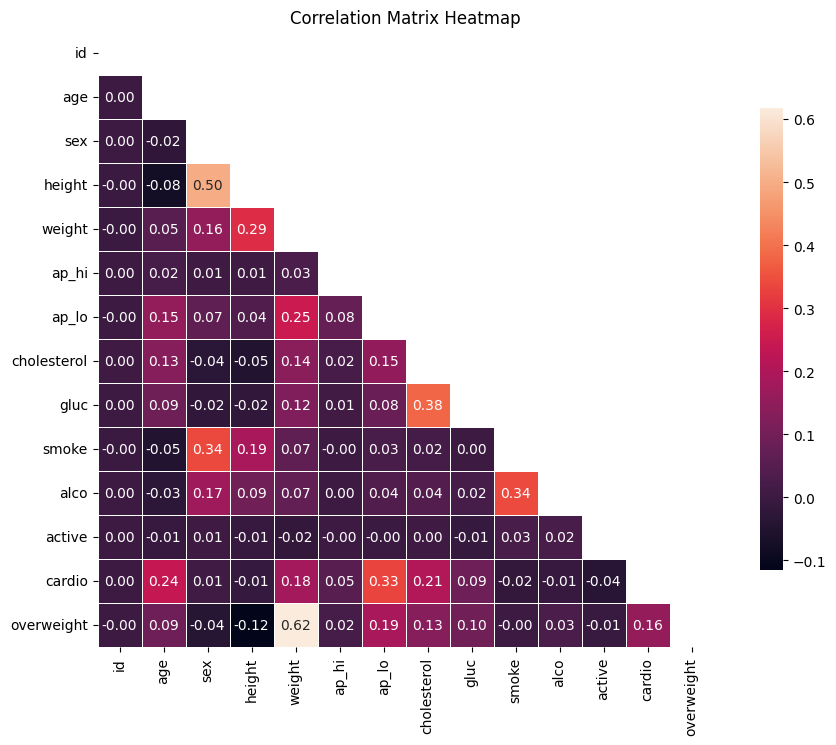

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(12,8 ))

# Plot the heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f",  # Format annotations to 2 decimal places
    mask=mask, 
    square=True, 
    cbar_kws={"shrink": 0.75}, 
    linewidths=0.5
)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()